# Running the models 

In [1]:
# Import necessary libraries
import json
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, auc, precision_recall_curve, confusion_matrix
import pandas as pd
import logging
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

## Load data 

In [6]:
merged_df = pd.read_csv('/Users/dionnespaltman/Desktop/V3/merged_df.csv', sep=',')

merged_df.drop('Unnamed: 0', axis=1, inplace=True)
merged_df.drop('Unnamed: 0.1', axis=1, inplace=True)

In [7]:
# Count the number of instances of people in VVR_group = 1 and VVR_group = 0
count_vvr_group = merged_df['VVR_group'].value_counts()

# Print the counts
print("Number of instances in VVR_group = 1:", count_vvr_group[1])
print("Number of instances in VVR_group = 0:", count_vvr_group[0])


Number of instances in VVR_group = 1: 26
Number of instances in VVR_group = 0: 85


In [15]:
display(merged_df.head(5))

,ID,sum_12,sum_4567,sum_456,VVR_group,Condition,VVR_1,VVR_2,AU01_r__sum_values,AU01_r__variance,...,AU26_r__minimum,AU26_r__mean,AU26_r__mean_abs_change,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__minimum,AU45_r__mean,AU45_r__mean_abs_change
0,23,24.0,37.0,27.0,0,2,13.0,11.0,4982.48,0.425041,...,0.00,0.633284,0.076328,9231.74,0.825039,0.908316,4.91,0.00,0.627753,0.133624
1,24,23.0,37.0,28.0,0,2,12.0,11.0,9390.23,0.448366,...,0.00,1.484701,0.125851,11887.00,0.634554,0.796589,5.00,0.00,0.436942,0.098134
2,25,28.0,44.0,33.0,1,2,16.0,12.0,6954.35,0.599805,...,0.00,0.862301,0.101969,9020.78,0.750701,0.866430,4.04,0.00,0.550652,0.085720
3,26,30.0,37.0,29.0,0,1,15.0,15.0,9707.43,0.873280,...,0.00,0.552359,0.069582,6585.31,0.609348,0.780607,4.90,0.00,0.371673,0.056287
4,27,22.0,39.0,31.0,1,2,11.0,11.0,21049.90,1.475421,...,-3.92,0.142027,0.386527,23027.73,1.160635,1.077328,5.04,-4.29,1.094318,0.231853


In [16]:
with open('/Users/dionnespaltman/Desktop/V3/columns_action_units.json', 'r') as f:
    columns_action_units = json.load(f)

print(len(columns_action_units))
print(columns_action_units)

119
['AU01_r__sum_values', 'AU01_r__variance', 'AU01_r__standard_deviation', 'AU01_r__maximum', 'AU01_r__minimum', 'AU01_r__mean', 'AU01_r__mean_abs_change', 'AU02_r__sum_values', 'AU02_r__variance', 'AU02_r__standard_deviation', 'AU02_r__maximum', 'AU02_r__minimum', 'AU02_r__mean', 'AU02_r__mean_abs_change', 'AU04_r__sum_values', 'AU04_r__variance', 'AU04_r__standard_deviation', 'AU04_r__maximum', 'AU04_r__minimum', 'AU04_r__mean', 'AU04_r__mean_abs_change', 'AU05_r__sum_values', 'AU05_r__variance', 'AU05_r__standard_deviation', 'AU05_r__maximum', 'AU05_r__minimum', 'AU05_r__mean', 'AU05_r__mean_abs_change', 'AU06_r__sum_values', 'AU06_r__variance', 'AU06_r__standard_deviation', 'AU06_r__maximum', 'AU06_r__minimum', 'AU06_r__mean', 'AU06_r__mean_abs_change', 'AU07_r__sum_values', 'AU07_r__variance', 'AU07_r__standard_deviation', 'AU07_r__maximum', 'AU07_r__minimum', 'AU07_r__mean', 'AU07_r__mean_abs_change', 'AU09_r__sum_values', 'AU09_r__variance', 'AU09_r__standard_deviation', 'AU09

## SMOTE 

In [9]:
# import statements 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
# Count the number of instances of people in VVR_group = 1 and VVR_group = 0
count_vvr_group = merged_df['VVR_group'].value_counts()

# Print the counts
print("Number of instances in VVR_group = 1:", count_vvr_group[1])
print("Number of instances in VVR_group = 0:", count_vvr_group[0])


Number of instances in VVR_group = 1: 26
Number of instances in VVR_group = 0: 85


In [21]:
columns_names_x = merged_df.columns
print(columns_names_x)

Index(['ID', 'sum_12', 'sum_4567', 'sum_456', 'VVR_group', 'Condition',
       'VVR_1', 'VVR_2', 'AU01_r__sum_values', 'AU01_r__variance',
       ...
       'AU26_r__minimum', 'AU26_r__mean', 'AU26_r__mean_abs_change',
       'AU45_r__sum_values', 'AU45_r__variance', 'AU45_r__standard_deviation',
       'AU45_r__maximum', 'AU45_r__minimum', 'AU45_r__mean',
       'AU45_r__mean_abs_change'],
      dtype='object', length=127)


In [24]:
# Extract features and target variable
columns_to_drop = [ 'ID', 'sum_12', 'sum_4567', 'sum_456', 'VVR_group', 'Condition', 'VVR_1', 'VVR_2'] 
X = merged_df.drop(columns_to_drop, axis=1)
y = merged_df['VVR_group']

print(len(X))

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

111


In [25]:
# Count the number of NaN values in each column of the DataFrame
nan_counts = merged_df.isna().sum()

# Print columns with NaN values
nan_columns = nan_counts[nan_counts > 0]
print("Columns with NaN values:")
print(nan_columns)


Columns with NaN values:
Series([], dtype: int64)


In [49]:
# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components (2 for 2D scatter plot)
X_pca = pca.fit_transform(X_scaled)

In [50]:
print(len(columns_action_units))
print(columns_action_units)

119
['AU01_r__sum_values', 'AU01_r__variance', 'AU01_r__standard_deviation', 'AU01_r__maximum', 'AU01_r__minimum', 'AU01_r__mean', 'AU01_r__mean_abs_change', 'AU02_r__sum_values', 'AU02_r__variance', 'AU02_r__standard_deviation', 'AU02_r__maximum', 'AU02_r__minimum', 'AU02_r__mean', 'AU02_r__mean_abs_change', 'AU04_r__sum_values', 'AU04_r__variance', 'AU04_r__standard_deviation', 'AU04_r__maximum', 'AU04_r__minimum', 'AU04_r__mean', 'AU04_r__mean_abs_change', 'AU05_r__sum_values', 'AU05_r__variance', 'AU05_r__standard_deviation', 'AU05_r__maximum', 'AU05_r__minimum', 'AU05_r__mean', 'AU05_r__mean_abs_change', 'AU06_r__sum_values', 'AU06_r__variance', 'AU06_r__standard_deviation', 'AU06_r__maximum', 'AU06_r__minimum', 'AU06_r__mean', 'AU06_r__mean_abs_change', 'AU07_r__sum_values', 'AU07_r__variance', 'AU07_r__standard_deviation', 'AU07_r__maximum', 'AU07_r__minimum', 'AU07_r__mean', 'AU07_r__mean_abs_change', 'AU09_r__sum_values', 'AU09_r__variance', 'AU09_r__standard_deviation', 'AU09

In [51]:
print(X_pca.shape)

# display(X_pca)


(111, 2)


In [52]:
# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

display(pca_df)

,PC1,PC2
0,-0.135141,0.158845
1,2.366097,-4.904490
2,-0.383904,0.054507
3,-2.415834,2.146693
4,36.912535,19.251673
...,...,...
106,2.010511,-2.456116
107,3.317928,-4.496892
108,-2.204928,3.196499
109,1.906894,-4.400740


In [53]:
# Concatenate the principal components with the target variable
final_df = pd.concat([pca_df, y], axis=1)

display(final_df)

,PC1,PC2,VVR_group
0,-0.135141,0.158845,0
1,2.366097,-4.904490,0
2,-0.383904,0.054507,1
3,-2.415834,2.146693,0
4,36.912535,19.251673,1
...,...,...,...
106,2.010511,-2.456116,0
107,3.317928,-4.496892,1
108,-2.204928,3.196499,0
109,1.906894,-4.400740,0


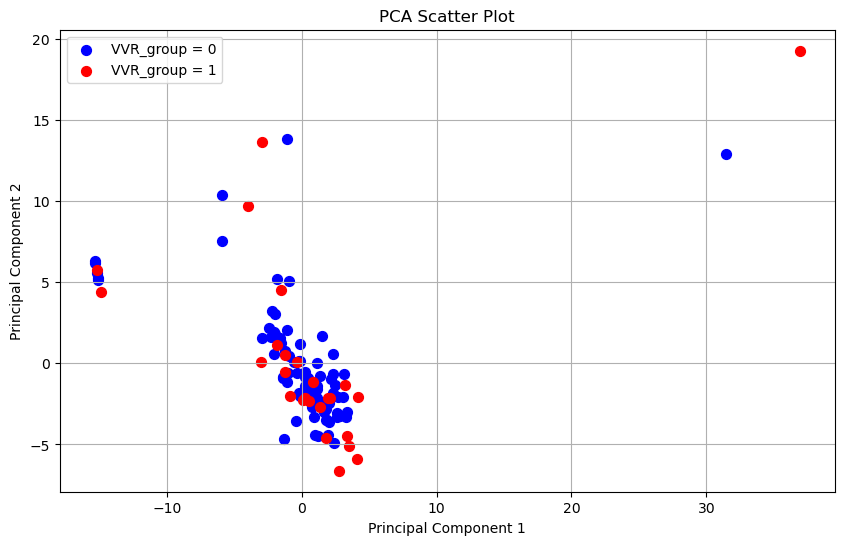

In [54]:
# Plot the data
plt.figure(figsize=(10, 6))
targets = [0, 1]  # VVR_group labels
colors = ['b', 'r']  # Blue for VVR_group = 0, Red for VVR_group = 1
for target, color in zip(targets, colors):
    indices_to_keep = final_df['VVR_group'] == target
    plt.scatter(final_df.loc[indices_to_keep, 'PC1'],
                final_df.loc[indices_to_keep, 'PC2'],
                c=color,
                s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.legend(['VVR_group = 0', 'VVR_group = 1'])
plt.grid(True)
plt.show()

## Train test split

In [54]:
train, test = train_test_split(merged_df, test_size=0.2, random_state=123)
train, val = train_test_split(train, stratify=train['VVR_group'], random_state=123)

train.drop('Unnamed: 0', axis=1, inplace=True)
test.drop('Unnamed: 0', axis=1, inplace=True)
val.drop('Unnamed: 0', axis=1, inplace=True)

In [55]:
print(train.shape)
display(train.head(5))

(66, 128)


,Unnamed: 0.1,ID,sum_12,sum_4567,sum_456,VVR_group,Condition,VVR_1,VVR_2,AU01_r__sum_values,...,AU26_r__minimum,AU26_r__mean,AU26_r__mean_abs_change,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__minimum,AU45_r__mean,AU45_r__mean_abs_change
61,78,88,18.0,32.0,24.0,0,1,9.0,9.0,10296.62,...,0.0,0.815700,0.083855,11934.82,0.882494,0.939412,4.95,0.0,0.559296,0.088857
89,108,121,25.0,47.0,37.0,1,2,12.0,13.0,8417.03,...,0.0,0.496452,0.056181,5811.91,0.133940,0.365978,2.64,0.0,0.210112,0.032116
64,82,93,16.0,32.0,24.0,0,1,8.0,8.0,5385.21,...,0.0,0.798643,0.138848,13323.30,0.856142,0.925279,4.19,0.0,0.547428,0.075234
45,61,71,25.0,33.0,24.0,0,1,14.0,11.0,17332.81,...,0.0,0.860467,0.093140,14039.45,0.535330,0.731662,4.34,0.0,0.463134,0.071848
16,32,39,20.0,34.0,26.0,0,1,11.0,9.0,9204.82,...,0.0,1.190539,0.102411,11287.74,1.080609,1.039524,5.00,0.0,0.640948,0.100654


In [56]:
print(test.shape)
display(test.head(5))

(23, 128)


,Unnamed: 0.1,ID,sum_12,sum_4567,sum_456,VVR_group,Condition,VVR_1,VVR_2,AU01_r__sum_values,...,AU26_r__minimum,AU26_r__mean,AU26_r__mean_abs_change,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__minimum,AU45_r__mean,AU45_r__mean_abs_change
94,114,127,25.0,40.0,29.0,0,3,15.0,10.0,13911.57000,...,0.000000,0.779323,0.088858,10158.120000,0.525558,0.724954,4.040000,0.000000,0.441063,0.057725
106,129,142,20.0,34.0,26.0,0,3,11.0,9.0,11750.48000,...,0.000000,0.448007,0.076771,10547.030000,0.506052,0.711374,3.530000,0.000000,0.457691,0.055759
42,58,67,16.0,32.0,24.0,0,1,8.0,8.0,7844.71717,...,0.743851,0.743851,0.000000,10377.048717,0.000000,0.000000,0.512169,0.512169,0.512169,0.000000
81,100,113,21.0,38.0,28.0,0,3,11.0,10.0,0.00000,...,0.000000,1.338750,0.567143,3.860000,0.295919,0.543984,1.320000,0.000000,0.482500,0.200000
108,131,144,24.0,35.0,27.0,0,3,12.0,12.0,7175.00000,...,0.000000,0.551210,0.075307,7319.310000,0.418456,0.646882,3.780000,0.000000,0.391344,0.072455


In [57]:
print(val.shape)
display(val.head(5))

(22, 128)


,Unnamed: 0.1,ID,sum_12,sum_4567,sum_456,VVR_group,Condition,VVR_1,VVR_2,AU01_r__sum_values,...,AU26_r__minimum,AU26_r__mean,AU26_r__mean_abs_change,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__minimum,AU45_r__mean,AU45_r__mean_abs_change
32,48,57,24.0,38.0,28.0,0,2,13.0,11.0,12516.80,...,0.0,0.981026,0.090373,18179.95,1.253354,1.119533,4.92,0.0,0.737164,0.078196
98,119,132,21.0,35.0,27.0,0,3,10.0,11.0,7056.68,...,0.0,0.792035,0.090189,8683.05,0.402135,0.634141,4.53,0.0,0.392241,0.070557
62,80,91,21.0,35.0,27.0,0,2,11.0,10.0,6520.46,...,0.0,0.662128,0.069108,8142.39,0.722803,0.850178,4.81,0.0,0.445158,0.071289
65,83,94,19.0,34.0,25.0,0,3,10.0,9.0,9445.82,...,0.0,0.725284,0.101624,8031.51,0.798583,0.893634,4.82,0.0,0.522477,0.073509
73,91,102,31.0,52.0,42.0,1,1,17.0,14.0,6050.79,...,0.0,0.314870,0.050167,16885.76,1.121810,1.059156,4.32,0.0,0.668214,0.078689


## Define featurizer 

In [27]:
featurizer = ColumnTransformer(transformers=[("numeric", StandardScaler(), columns_action_units)], remainder='drop')

print(featurizer)

ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                 ['AU01_r__sum_values', 'AU01_r__variance',
                                  'AU01_r__standard_deviation',
                                  'AU01_r__maximum', 'AU01_r__minimum',
                                  'AU01_r__mean', 'AU01_r__mean_abs_change',
                                  'AU02_r__sum_values', 'AU02_r__variance',
                                  'AU02_r__standard_deviation',
                                  'AU02_r__maximum', 'AU02_r__minimum',
                                  'AU02_r__mean', 'AU02_r__mean_abs_change',
                                  'AU04_r__sum_values', 'AU04_r__variance',
                                  'AU04_r__standard_deviation',
                                  'AU04_r__maximum', 'AU04_r__minimum',
                                  'AU04_r__mean', 'AU04_r__mean_abs_change',
                                  'AU05_r__sum_values', 'AU05_r__varian

## Define models  

In [28]:
dummy = make_pipeline(featurizer, DummyClassifier(strategy='most_frequent'))
rf = make_pipeline(featurizer, RandomForestClassifier())
svm = make_pipeline(featurizer, SVC())
multiclass_svm = make_pipeline(featurizer, SVC(decision_function_shape='ovr'))
xgb = make_pipeline(featurizer, XGBClassifier())
mlp = make_pipeline(featurizer, MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000))

models = {
    "Dummy": dummy,
    "RandomForest": rf,
    "SVM": svm,
    "Multiclass SVM": multiclass_svm,
    "XGBoost": xgb,
    "MLP": mlp
}

## Evaluate 

In [36]:
# def evaluate_model(model, X, y):
#     """
#     Evaluate the model's performance
#     """
#     model.fit(X, y)
#     y_probs = model.predict_proba(X)[:, 1]
#     precision = precision_score(y, model.predict(X))
#     recall = recall_score(y, model.predict(X))
#     f1 = f1_score(y, model.predict(X))
#     precision_curve, recall_curve, _ = precision_recall_curve(y, y_probs)
#     auc_pr = auc(recall_curve, precision_curve)
#     cm = confusion_matrix(y, model.predict(X))
    
#     logging.info(f"Precision: {precision}")
#     logging.info(f"Recall: {recall}")
#     logging.info(f"F1-score: {f1}")
#     logging.info(f"AUC-PR score: {auc_pr}")
#     logging.info(f"Confusion Matrix:")
#     logging.info(cm)

## Main

In [37]:
# Set logging level to INFO
logging.getLogger().setLevel(logging.INFO)

# merged_df = load_data()
# train, val, test = split_data(merged_df)
# columns_action_units = load_columns()
# featurizer = define_featurizer(columns_action_units)
# models = define_models(featurizer)

logging.info("Fitting models")

for name, model in models.items():
    model.fit(train.drop('VVR_group', axis=1), train['VVR_group'].values)
    logging.info(f"Evaluating {name} on validation data")
    pred = model.predict(val.drop('VVR_group', axis=1))
    accuracy = accuracy_score(val['VVR_group'].values, pred)
    report = classification_report(val['VVR_group'].values, pred)
    cm = confusion_matrix(val['VVR_group'].values, pred)
    
    logging.info(f"{name} Accuracy: {accuracy}")
    logging.info(f"{name} Classification Report:")
    logging.info(report)
    logging.info(f"{name} Confusion Matrix:")
    logging.info(cm)

best_model_name = max(models, key=lambda x: accuracy_score(val['VVR_group'].values, models[x].predict(val.drop('VVR_group', axis=1))))
best_model = models[best_model_name]

# logging.info(f"Predicting on test using best model: {best_model_name}")

pred = best_model.predict(test.drop('VVR_group', axis=1))

accuracy = accuracy_score(test['VVR_group'].values, pred)
report = classification_report(test['VVR_group'].values, pred)
cm = confusion_matrix(test['VVR_group'].values, pred)

logging.info(f"{best_model_name} Accuracy on Test Data: {accuracy}")
logging.info(f"{best_model_name} Classification Report on Test Data:")
logging.info(report)
logging.info(f"{best_model_name} Confusion Matrix:")
logging.info(cm)

# 

INFO:root:Fitting models
INFO:root:Evaluating Dummy on validation data
/Users/dionnespaltman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dionnespaltman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dionnespaltman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

## ... 

## ... 